In [ ]:
import pandas as pd
import numpy as np
from PIL import Image, ImageChops
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
import cv2
from tqdm import tqdm
tqdm.pandas()
warnings.filterwarnings("ignore")

# Training Data


In [ ]:
train_data = pd.read_csv('../input/bms-molecular-translation/train_labels.csv')
train_data.head()

In [ ]:
print("Training Data Size",train_data.shape[0])
print('Number of unique chemical identifier:',len(train_data['InChI'].value_counts().index))

# Checking NAN values

In [ ]:
train_data.isna().sum()

If we carefully watch image-name, first 3 characters in the id represents the folder structure,
so using this lets construct the fully qualified image path for each image using below code

In [ ]:
image_path = "../input/bms-molecular-translation/train/{}/{}/{}/{}.png"
image_id_to_path = lambda image_id :image_path.format(image_id[0], image_id[1], image_id[2], image_id) 

In [ ]:
train_data['image_path'] = train_data['image_id'].apply(image_id_to_path)
train_data.head()

# Image Height and Width

In [ ]:
height_shape=[]
width_shape=[]

for idx,image_id in enumerate(train_data.image_id.values[:1000]):
    image = cv2.imread(train_data['image_path'][idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height_shape.append(image.shape[0])
    width_shape.append(image.shape[1])

In [ ]:
plt.figure(figsize=(12, 7))
sns.distplot(width_shape)
plt.title("Image Width Distribution", fontsize=14)

Observation 
* most of image has the Image Width below the 800

In [ ]:
plt.figure(figsize=(12, 7))
sns.distplot(height_shape)
plt.title("Image Height Distribution", fontsize=14)

Observation 
* most of image has the Image Height below the 500

# Distribution of label(InChI) length

In [ ]:
label_lengths = train_data['InChI'].progress_apply(lambda x: len(x))
sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))
plt.title('Distribution of label length', fontsize = '15')
sns.kdeplot(label_lengths, fill = True, color = '#EE370F', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('InChlI length')
plt.show()

Observation 
* most of image InChI label length is below 250

#  Image and Image InChI 

In [ ]:
df = train_data[:6]
plt.figure(figsize = (15, 15))
for ind, (image_id, label) in enumerate(zip(df['image_id'], df["InChI"].values)):
    plt.subplot(3, 2, ind + 1)
    image = cv2.imread(image_id_to_path(image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f"{label[:30]}...", fontsize=15)
    plt.axis("off")
    
plt.show()

In [ ]:
print(train_data['InChI'].iloc[0])
print("Length of InChI of this Image",len(train_data['InChI'].iloc[0]))
Image.open(train_data['image_path'].iloc[0])

# STRUCTURE

Every InChI starts with the string "InChI=" followed by the version 

If the InChI is standard, this is followed by the letter S for standard InChIs, which is a fully standardized InChI flavor maintaining the same level of attention to structure details and the same conventions for drawing perception.

The remaining information is structured as a sequence of layers and sub-layers, with each layer providing one specific type of information.

The layers and sub-layers are separated by the delimiter "/" and start with a characteristic prefix letter (except for the chemical formula sub-layer of the main layer).

The six layers with important sublayers are:




## 1. Main Layer
 Main layer can be split up into three sub-layers:


* Chemical formula (no prefix). This is the only sublayer that must occur in every InChI.
* Atom connections (prefix: "c").
The atoms in the chemical formula (except for hydrogens) are numbered in sequence. This sublayer describes which atoms are connected by bonds to which other ones.
* Hydrogen atoms (prefix: "h").
Describes how many hydrogen atoms are connected to each of the other atoms.


## 2. Charge Layer

* Charge Sublayer (prefix: "q")
* Proton Sublayer (prefix: "p")


## 3. Stereochemical Layer
The two types of represented stereochemistry, double bond and tetrahedral,

* Double Bonds and Cumulenes (prefix: "b")
* Tetrahedral Stereochemistry of Atoms and Allenes (prefixes: "t")



## 4. Isotopic Layer

* prefixes: "i", "h", as well as "b", "t", "m", "s" for isotopic stereochemistry


## 5. Fixed-H Layer

* prefix: "f". NEVER INCLUDED IN STANDARD INCHI


## 6. Reconnected Layer

* prefix: "r". NEVER INCLUDED IN STANDARD INCHI

In [ ]:
Image.open(train_data['image_path'].iloc[0])

# Version Number

In [ ]:
print("InChi Version ",train_data['InChI'].iloc[0].split("/")[0])
Image.open(train_data['image_path'].iloc[0])

# Chemical formula

In [ ]:
print("Chemical Formula",train_data['InChI'].iloc[0].split("/")[1])
Image.open(train_data['image_path'].iloc[0])

# Atom Connection

In [ ]:
print("Atom Connection",train_data['InChI'].iloc[0].split("/")[2])
Image.open(train_data['image_path'].iloc[0])

# Hydrogen atoms

In [ ]:
print("Hydrogen atoms ",train_data['InChI'].iloc[0].split("/")[3].split(",")[0])
Image.open(train_data['image_path'].iloc[0])

### From Below Image you can easily understand the all layers 

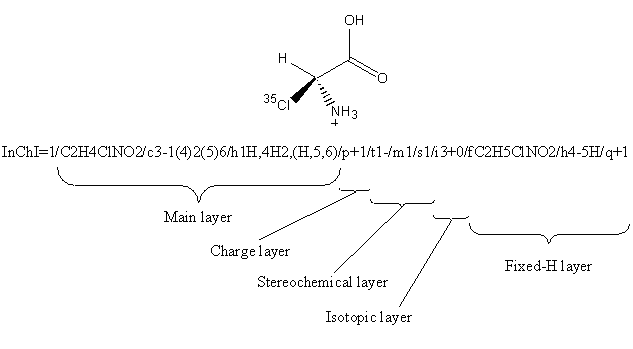

# References:
* https://www.inchi-trust.org/technical-faq-2/
* https://www.kaggle.com/ayuraj/bms-eda-and-dataset-visualization-w-w-b
* https://www.kaggle.com/dschettler8845/molecular-translation-eda-smart-baseline


If you find the work useful please considering upvoting the kernel. Share your own opinion and things to improve/add